In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
glass = pd.read_csv('glass.csv')

In [3]:
X = glass.drop(columns = ['Type'])
Y = glass['Type']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [6]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train, y_train)

SVC()

In [11]:
print(svc.score(x_train, y_train))
print(svc.score(x_test, y_test))

0.7919463087248322
0.6923076923076923


In [7]:
y_pred = svc.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y_test, y_pred)

array([[16,  3,  0,  0,  0,  0],
       [ 6, 16,  0,  0,  1,  0],
       [ 2,  2,  0,  0,  0,  0],
       [ 1,  3,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  2,  0],
       [ 1,  0,  0,  0,  0,  9]], dtype=int64)

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.84      0.71        19
           2       0.64      0.70      0.67        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.67      0.67      0.67         3
           7       1.00      0.90      0.95        10

    accuracy                           0.69        65
   macro avg       0.65      0.57      0.58        65
weighted avg       0.68      0.69      0.67        65



## SVM

### Ïû•Ï†ê
#### Ï†ÄÏ∞®ÏõêÍ≥º Í≥†Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Ïóê Î™®Îëê Ïûò ÏûëÎèôÌïúÎã§.
#### ÌëúÎ≥∏ÏàòÎ≥¥Îã§ Ï∞®Ïõê ÏàòÍ∞Ä ÎßéÏùÄ Í≤ΩÏö∞ÏóêÎèÑ Ìö®Í≥ºÏ†ÅÏù¥Îã§.
#### ÎπÑÏÑ†Ìòï Î∂ÑÎ¶¨ Îç∞Ïù¥ÌÑ∞Î•º Ïª§ÎÑêÌï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Î∂ÑÎ•ò Î™®Îç∏ÎßÅ Ìï† Ïàò ÏûàÎã§.


### Îã®Ï†ê
#### ÌîºÏ≥ê ÏàòÍ∞Ä ÏÉòÌîå ÏàòÎ≥¥Îã§ ÎßéÏùÑ Í≤ΩÏö∞ Ïª§ÎÑê Ìï®ÏàòÎ•º ÏÑ†ÌÉùÌï† Îïå Í≥ºÏ†ÅÌï©ÏùÑ ÌîºÌï¥ÏïºÌïúÎã§.
#### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÏôÄ Îß§Í∞úÎ≥ÄÏàò ÏÑ§Ï†ïÏóê Îî∞Îùº Ï†ïÌôïÎèÑÍ∞Ä Îã¨ÎùºÏßÑÎã§.
#### ÏòàÏ∏°Ïù¥ Ïñ¥ÎñªÍ≤å Ïù¥Î£®Ïñ¥ÏßÄÎäîÏßÄÏóê ÎåÄÌïú Ïù¥Ìï¥ÏôÄ Î™®Îç∏Ïóê ÎåÄÌïú Ìï¥ÏÑùÏù¥ Ïñ¥Î†µÎã§.
#### ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î™®Ìòï Íµ¨Ï∂ïÏãú ÏÜçÎèÑÍ∞Ä ÎäêÎ¶¨Í≥†, Î©îÎ™®Î¶¨ Ìï†ÎãπÎüâÏù¥ ÌÅ¨Îã§.

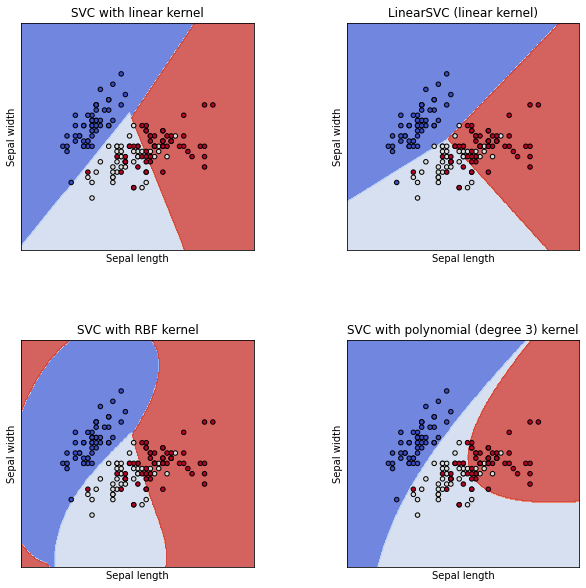

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize = (10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## ÏÜåÌîÑÌä∏ÎßàÏßÑÍ≥º ÌïòÎìúÎßàÏßÑ

### ÏÜåÌîÑÌä∏ ÎßàÏßÑ
#### - SVMÏóêÏÑú CÍ∞íÏùÑ ÏûëÍ≤åÌïòÏó¨ ÎßàÏßÑÏùÑ ÎÑìÍ≤å ÌïòÎèÑÎ°ù ÌïòÎäî Î∞©Î≤ï.
#### - CÍ∞íÏù¥ ÎÑàÎ¨¥ ÏûëÏúºÎ©¥ Ïñ∏ÎçîÌîºÌåÖÏù¥ Îê† Ïàò ÏûàÎã§.
#### - ÏÑúÌè¨Ìä∏Î≤°ÌÑ∞ÏôÄ Í≤∞Ï†ïÍ≤ΩÍ≥Ñ ÏÇ¨Ïù¥Ïóê Í∞ÑÍ≤©(ÎßàÏßÑ)Ïù¥ ÎÑìÎã§.

### ÌïòÎìú ÎßàÏßÑ
#### - SVMÏóêÏÑú CÍ∞íÏùÑ ÌÅ¨Í≤åÌïòÏó¨ Î∂ÑÎ•òÎ•º Ï†ïÌôïÌûà Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïòÎäî Î∞©Î≤ï.
#### - CÍ∞íÏùÑ Í≥ºÎèÑÌïòÍ≤å ÎÜíÏùºÍ≤ΩÏö∞ Í≥ºÎåÄ Ï†ÅÌï©ÏùÑ Î∂àÎü¨Ïò¨ Ïàò ÏûàÎã§.
#### - ÏÑúÌè¨Ìä∏Î≤°ÌÑ∞ÏôÄ Í≤∞Ï†ïÍ≤ΩÍ≥Ñ ÏÇ¨Ïù¥Ïóê Í∞ÑÍ≤©(ÎßàÏßÑ)Ïù¥ Ï¢ÅÎã§.

In [12]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # ÍΩÉÏûé Í∏∏Ïù¥, ÍΩÉÏûé ÎÑàÎπÑ
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

In [16]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Í≤∞Ï†ï Í≤ΩÍ≥ÑÏóêÏÑú w0*x0 + w1*x1 + b = 0 Ïù¥ÎØÄÎ°ú
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [17]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [18]:
# Ïä§ÏºÄÏùºÎêòÏßÄ ÏïäÏùÄ ÌååÎùºÎØ∏ÌÑ∞Î°ú Î≥ÄÍ≤Ω
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Ï∞æÍ∏∞ (libsvmÍ≥º Îã¨Î¶¨ liblinear ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú Ï†úÍ≥µÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê 
# LinearSVCÏóêÎäî ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞Í∞Ä Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel() #ravelÏùÄ 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÎßåÎì§Ïñ¥Ï£ºÎäî numpyÌï®ÏàòÎ°ú flattenÍ≥º ÎπÑÏä∑ÌïòÎã§.
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

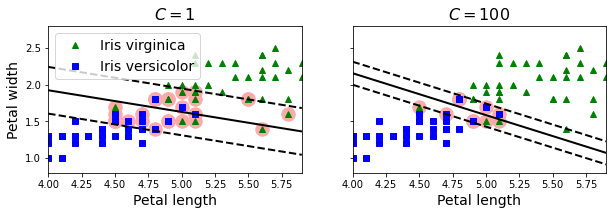

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])
plt.show()

## ÎπÑÏÑ†Ìòï SVM Î∂ÑÎ•ò

## Ïª§ÎÑê(Kernel)

### Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÏÑ†Ìòï(linear) Ïª§ÎÑêÏù¥Î©∞, ÌååÎùºÎØ∏ÌÑ∞Î°ú Îã§Ìï≠Ïãù(Polynomial), Í∞ÄÏö∞ÏãúÍ∞Ñ RBF Ïª§ÎÑê, ÏãúÍ∑∏Î™®Ïù¥Îìú Ïª§ÎÑê Îì±Ïù¥ ÏûàÎã§.


#### Îã§Ìï≠Ïãù(Polynomial) : Ï∞®ÏàòÎ•º ÏÑ§Ï†ïÌïòÏó¨ Îã§Ìï≠Ïãù Ïª§ÎÑêÏùÑ Ï†ÅÏö© ÏãúÌÇ¨ Ïàò ÏûàÎã§. Î™®Îç∏Ïù¥ Í≥ºÎåÄ Ï†ÅÌï©Ïù¥Î©¥ Ï∞®ÏàòÎ•º Ï§ÑÏù¥Í≥†, Í≥ºÏÜåÏ†ÅÌï©Ïù¥Î©¥ Ï∞®ÏàòÎ•º ÎäòÎ¶∞Îã§. 

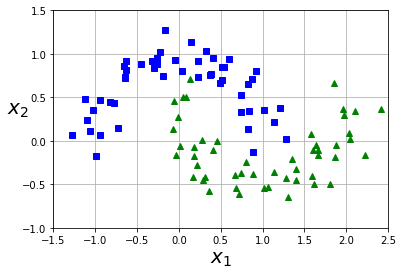

In [22]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [26]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [27]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
# kernel : ÏÇ¨Ïö©Ìï† Ïª§ÎÑê ÏÑ§Ï†ï poly : Îã§Ìï≠ÏãùÏª§ÎÑê, rbf : Í∞ÄÏö∞ÏãúÏïà RBFÏª§ÎÑê
# degree : Îã§Ìï≠ÏãùÏùò Ï∞®Ïàò
# coef0 : Î™®Îç∏Ïù¥ ÎÜíÏùÄ Ï∞®ÏàòÏôÄ ÎÇÆÏùÄ Ï∞®ÏàòÏóê ÏñºÎßàÎÇò ÏòÅÌñ•ÏùÑ Î∞õÏùÑÏßÄ Ï°∞Ï†à polyÏôÄ sigmoid Ïª§ÎÑêÏóêÎßå ÏÇ¨Ïö©ÌïúÎã§.
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [28]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

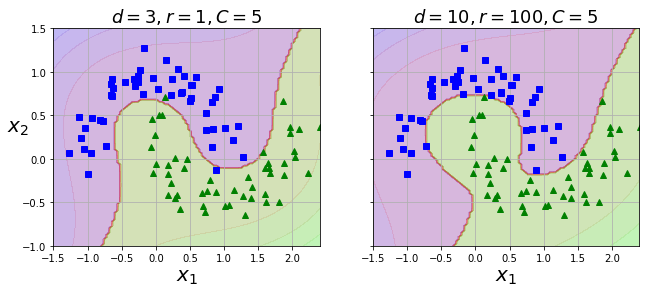

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

#### Í∞ÄÏö∞ÏãúÏïà RBF(Î∞©ÏÇ¨Í∏∞Ï†ÄÌï®Ïàò) Ïª§ÎÑê : SVCÏùò Í∏∞Î≥∏(default) Ïª§ÎÑêÎ°ú ùõæ(Í∞êÎßà)Î•º ÌÜµÌï¥ Í≤∞Ï†ï Í≤ΩÍ≥ÑÏùò Í≥°Î•†ÏùÑ Ï°∞Ï†ïÌïòÏó¨ Î∂ÑÎ•ò Í≤ΩÍ≥ÑÎ©¥ÏùÑ ÏµúÏ†ÅÌôî ÌïúÎã§.

#### Í∞ÄÏö∞ÏãúÏïà RBF Ïãù

$
{\displaystyle \phi_{\gamma}(\mathbf{x}, \boldsymbol{\ell})} = {\displaystyle \exp({\displaystyle -\gamma \left\| \mathbf{x} - \boldsymbol{\ell} \right\|^2})}
$

#### ùõæ(Í∞êÎßà) : Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎ•º ÏñºÎßàÎÇò Ïú†Ïó∞ÌïòÍ≤å Í∑∏Î¶¥ÏßÄ Ï°∞Ï†ïÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Ïù¥Îã§.
#### Í∞êÎßàÍ∞Ä ÌÅ¨Î©¥ Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎ•º ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïóê ÏùòÏ°¥Ìï¥ÏÑú Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎ•º Í≥°ÏÑ†ÏúºÎ°ú Í∑∏Î¶∞Îã§. ÌïòÏßÄÎßå ÎÑàÎ¨¥ÌÅ¨Î©¥ Í≥ºÎåÄÏ†ÅÌï©Ïù¥ Îê† Ïàò ÏûàÎã§.
#### Í∞êÎßàÍ∞Ä ÏûëÏúºÎ©¥ Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎ•º ÏßÅÏÑ†Ïóê Í∞ÄÍπùÍ≤å Í∑∏Î¶∞Îã§. ÎÑàÎ¨¥ ÏûëÏúºÎ©¥ Í≥ºÏÜåÏ†ÅÌï©Ïù¥ Îê† Ïàò ÏûàÎã§.

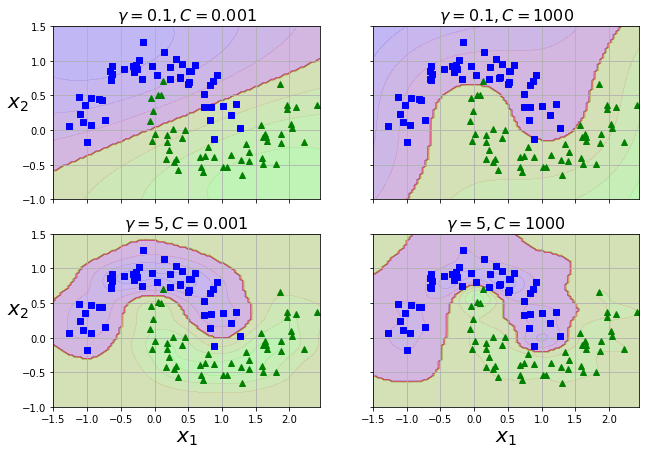

In [31]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")


plt.show()

#### ÎπÑÏÑ†Ìòï SVM Î™®Îç∏ÏóêÏÑúÎäî ÎåÄÎ∂ÄÎ∂Ñ Îã§Ìï≠Ïãù(Polynomial) Ïª§ÎÑêÏù¥ÎÇò Í∞ÄÏö∞ÏãúÏïà RBF Ïª§ÎÑê ÏÇ¨Ïö©
#### Ïó¨Îü¨Í∞ÄÏßÄ Ïª§ÎÑêÏ§ë Í∞ÄÏû• Î®ºÏ†Ä ÏÇ¨Ïö©Ìï¥ÏïºÌï† Ïª§ÎÑêÏùÄ ÏÑ†ÌòïÏª§ÎÑê(LinearSVCÎÇò kernel = "linear"), ÌäπÌûà ÌõàÎ†®ÏÑ∏Ìä∏Í∞Ä ÏïÑÏ£º ÌÅ¨Í±∞ÎÇò ÌäπÏÑ±ÏàòÍ∞Ä ÎßéÏùÑ Í≤ΩÏö∞
#### ÌõàÎ†® ÏÑ∏Ìä∏Í∞Ä ÎßéÏßÄ ÏïäÏùÑÎïåÎäî Í∞ÄÏö∞ÏãúÏïà RBF Ïª§ÎÑêÎèÑ ÏãúÎèÑÌï¥Î≥¥ÎäîÍ≤ÉÎèÑ Ï¢ãÎã§.
#### ÎåÄÎ∂ÄÎ∂Ñ Ïù¥Ï†ïÎèÑÎ©¥ Ï∂©Î∂ÑÌïòÎÇò ÏãúÍ∞ÑÏù¥ÎÇò Ïª¥Ìì®ÌÑ∞ ÏûêÏõêÏù¥ ÎÇ®ÎäîÍ≤ΩÏö∞ ÍµêÏ∞®Í≤ÄÏ¶ùÏù¥ÎÇò Í∑∏Î¶¨ÎìúÏÑúÏπòÎ•º ÌÜµÌï¥ÏÑú ÏïåÎßûÏùÄ ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäîÍ≤ÉÏù¥ Ï†úÏùº Ï¢ãÏùå.

### ÏãúÍ∞ÑÎ≥µÏû°ÎèÑ

#### LinearSVCÎäî liblinearÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Í∏∞Î∞òÏúºÎ°ú ÌïòÎäî ÏÑ†Ìòï SVMÏúºÎ°ú ÌõàÎ†® ÏÉòÌîåÍ≥º ÌäπÏÑ± ÏàòÏóê Í±∞Ïùò ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÎäòÏñ¥ÎÇòÍ∏∞ ÎïåÎ¨∏Ïóê ÌõàÎ†®ÏãúÍ∞Ñ Î≥µÏû°ÎèÑÎäî ÎåÄÎûµ O(m(ÏÉòÌîå) * n(ÌäπÏÑ±)) Ï†ïÎèÑÏù¥Îã§.
#### SVCÎäî Ïª§ÎÑê Ìä∏Î¶≠ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Íµ¨ÌòÑÌïú libsvm ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Í∏∞Î∞òÏúºÎ°ú ÌïúÎã§. Ïù¥ ÏïåÍ≥†Î¶¨Ï¶òÏùò ÌõàÎ†®ÏãúÍ∞ÑÏùÄ $ O(n_{features} \times n_{samples}^2)$ Í≥º $O(n_{features} \times n_{samples}^3) $ ÏÇ¨Ïù¥Ïù¥Îã§.
#### Ïù¥Îäî ÌõàÎ†® ÏÉòÌîå ÏàòÍ∞Ä Ïª§ÏßÄÎ©¥ ÏóÑÏ≤≠ÎÇòÍ≤å ÎäêÎ†§ÏßÄÎäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.

### SVM ÌöåÍ∑Ä(SVR)

#### SVRÏùÄ SVCÏôÄ Î∞òÎåÄÎ°ú ÎßàÏßÑÏóê ÏµúÎåÄÌïú ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Îì§Ïñ¥Í∞ÄÎèÑÎ°ù ÌïôÏäµ ÌïòÎäî Í≤ÉÏù¥Îã§.
#### SVRÏùÄ epsilonÏù¥ÎùºÎäî ÌååÎùºÎØ∏ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ ÎßàÏßÑÏùò Ìè≠ÏùÑ Ï°∞Ï†ïÌïúÎã§.

In [32]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [34]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

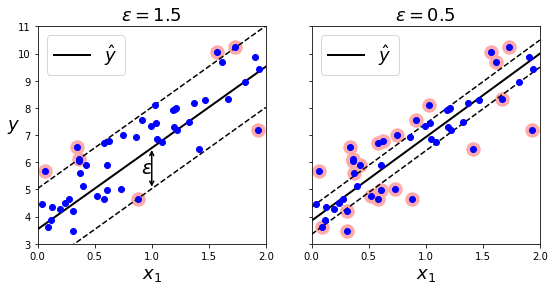

In [36]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()

### ÎπÑÏÑ†Ìòï SVR Î™®Îç∏

In [37]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [38]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

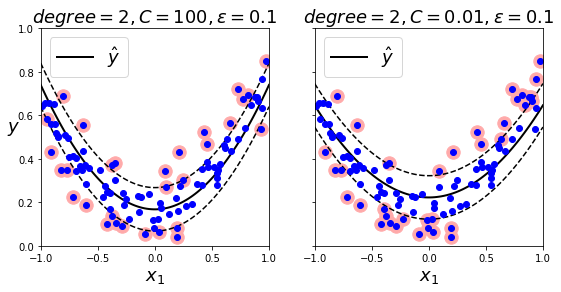

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()

## Naive Bayes

### Gaussian Naive Bayes : Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Í∞ÄÏ†ïÌïú ÌëúÎ≥∏Îì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏùÑ ÎÇòÌÉÄÎÇ¥, Ìï≠ÏÉÅ Í∞ôÏùÄ Î∂ÑÎ™®Î•º Í∞ñÎäî Ï°∞Í±¥ÌïòÏóêÏÑú, Î∂ÑÏûêÍ∞íÏù¥ Í∞ÄÏû• ÌÅ∞ Í≤ΩÏö∞(Ï¶â, ÌôïÎ•†Ïù¥ ÌÅ∞ Í≤ΩÏö∞)Î•º ÏÑ†ÌÉùÌïòÎäî Í≤É.

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 0)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [45]:
gnb.score(X_train, y_train)

0.9733333333333334

In [49]:
from sklearn.metrics import accuracy_score

y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(accuracy_score(y_test, y_pred))


0.9466666666666667


### Multinomial Naive Beyse(Îã§Ìï≠ Î∂ÑÌè¨ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à) : Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏßïÏù¥ Ï∂úÌòÑ ÌöüÏàòÎ°ú ÌëúÌòÑÎêòÏóàÏùÑ Îïå Ï£ºÎ°ú ÏÇ¨Ïö©, ÌÖçÏä§Ìä∏ Î∂ÑÎ•òÏóê ÎßéÏù¥ ÏÇ¨Ïö©ÎêúÎã§.

### Bernoulli Naive Bayes(Î≤†Î•¥ÎàÑÏù¥ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à) : Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏßïÏù¥ Ï∂úÌòÑ Ïú†Î¨¥Î°ú ÌëúÌòÑÎêòÏóàÏùÑ Îïå Ï£ºÎ°ú ÏÇ¨Ïö©, Ïä§Ìå∏Î©îÏùº Î∂ÑÎ•ò Îì±Ïóê ÎßéÏù¥ Ïù¥Ïö©ÎêúÎã§.